# Introduction 

The problem here is to make a prediction for a titanic passenger whether he/she was dead or alive in the titanic accident. For this purpose we take half of the titanic passenger and closely look at the distinction between dead/alive passengers in terms of various features, such as their gender, age, fare etc. We will make a model based on this observation and this will be able to predict for the other half of the passenger with more than 80% accuracy. Given the complexity of the situation it is impressive that machine learing can make a prediction with such a good strategy. 

# Importing packages to begin with


In [1]:
import numpy as np                     # For linear algebra 
import pandas as pd                    # For data frame 
import matplotlib.pyplot as plt        # For visualization 
import seaborn as sns; sns.set()       # Another tool for visualization 
%matplotlib inline                     

# Importing dataset

Test and train data is splitted from a single original data. Many features, like total family size etc.,  are better studied when test and train data are together. So, here we import the data and combine them to a single data set.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

df = train_df.append(test_df, sort = True)

In [11]:
print(train_df.shape)
print(train_df.size)

(891, 12)
10692


In [9]:
df.columns                 # This gives the list of column header name 

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

# Head, tail and sample 

In [3]:
df.head()             # Shows the head of the data frame 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
df.tail(3)             # There is similar option for tail. We can pass argument on head and tails to see specific number of rows

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [5]:
train_df.sample(4)     # This gives random rows. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S


In [7]:
train_df[train_df['Age'] <= 1]        # Boolean masking to extract the part of the data. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


# Survived?

Majority of the passenger did not survive. We can look at this information in the following figure and pie chart. We will explore more detail about the distinction between survived and dead people later. 

In [18]:
train_df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


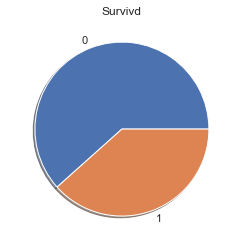

In [19]:
train_df['Survived'].value_counts().plot.pie(shadow = True)
plt.title('Survivd')
plt.ylabel('')
plt.show()

# Information about the data 

In [8]:
# Panda's DataFrame.info() gives the information about the data frame object 

train_df.info()
print('=' * 50)
print('=' * 50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [10]:
train_df.isnull().sum()    # This counts the number of missing data in each column. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Statistics 

In [24]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Daly, Mr. Peter Denis",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [13]:
train_df.describe()             # This gives you the discriptive statistics of the data frame objects for each rows.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
test_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Baimbrigge, Mr. Charles Robert",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [22]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\Roshan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Roshan\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


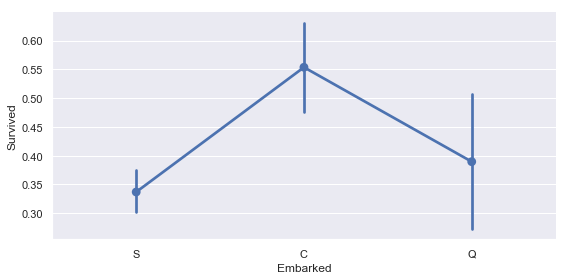

In [12]:
sns.factorplot('Embarked', 'Survived', data = df, size = 4, aspect = 2)

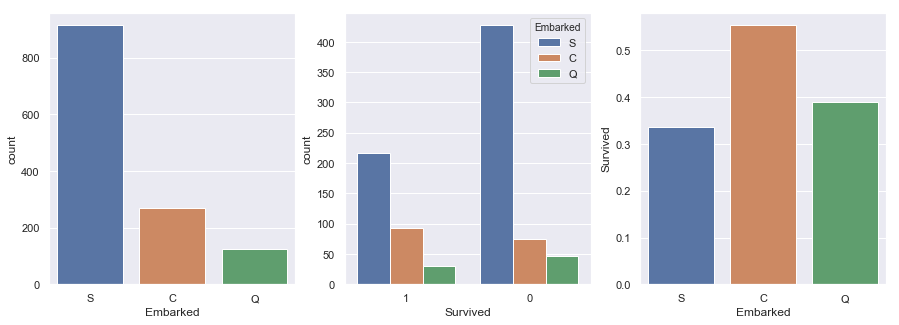

In [13]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (15, 5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x = 'Embarked', data = df, ax = axis1)
sns.countplot(x = 'Survived', hue = 'Embarked', data = df, order = [1,0], ax = axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = df[["Embarked", "Survived"]].groupby(['Embarked'], as_index = False).mean()
sns.barplot(x = 'Embarked', y = 'Survived', data = embark_perc, order = ['S','C','Q'], ax = axis3)

embark_dummies_titanic  = pd.get_dummies(df['Embarked'])
embark_dummies_titanic.drop(['S'], axis = 1, inplace = True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis = 1, inplace = True)

titanic_df = df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

#titanic_df.drop(['Embarked'], axis = 1, inplace = True)
#test_df.drop(['Embarked'], axis = 1,inplace = True)

In [14]:
# Fare

# only for test_df, since there is a missing "Fare" values
df['Fare'].fillna(df['Fare'].median(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

# convert from float to int
df['Fare'] = df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

In [16]:
# get fare for survived & didn't survive passengers 
fare_not_survived = df['Fare'][df['Survived'] == 0]
fare_survived = df['Fare'][df['Survived'] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
df['Fare'].plot(kind = 'hist', figsize = (15, 3), bins = 100, xlim = (0, 50))

avgerage_fare.index.names = std_fare.index.names = ['Survived']
avgerage_fare.plot(yerr = std_fare, kind = 'bar', legend = False)

NameError: name 'DataFrame' is not defined

<Figure size 432x288 with 0 Axes>

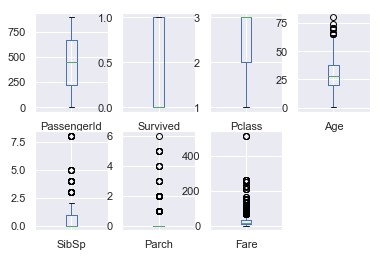

<Figure size 432x288 with 0 Axes>

In [27]:
train_df.plot(kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False)
plt.figure()

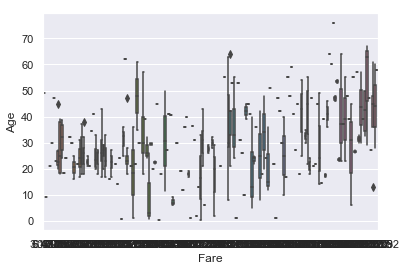

In [29]:
sns.boxplot(x = "Fare", y = "Age", data = test_df )
plt.show()

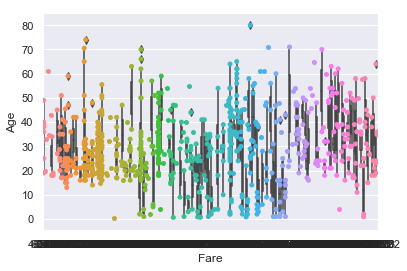

In [31]:
ax = sns.boxplot(x ="Fare", y = "Age", data = train_df)
ax = sns.stripplot(x = "Fare", y = "Age", data = train_df, jitter = True, edgecolor = "gray")
plt.show()

<Figure size 432x288 with 0 Axes>

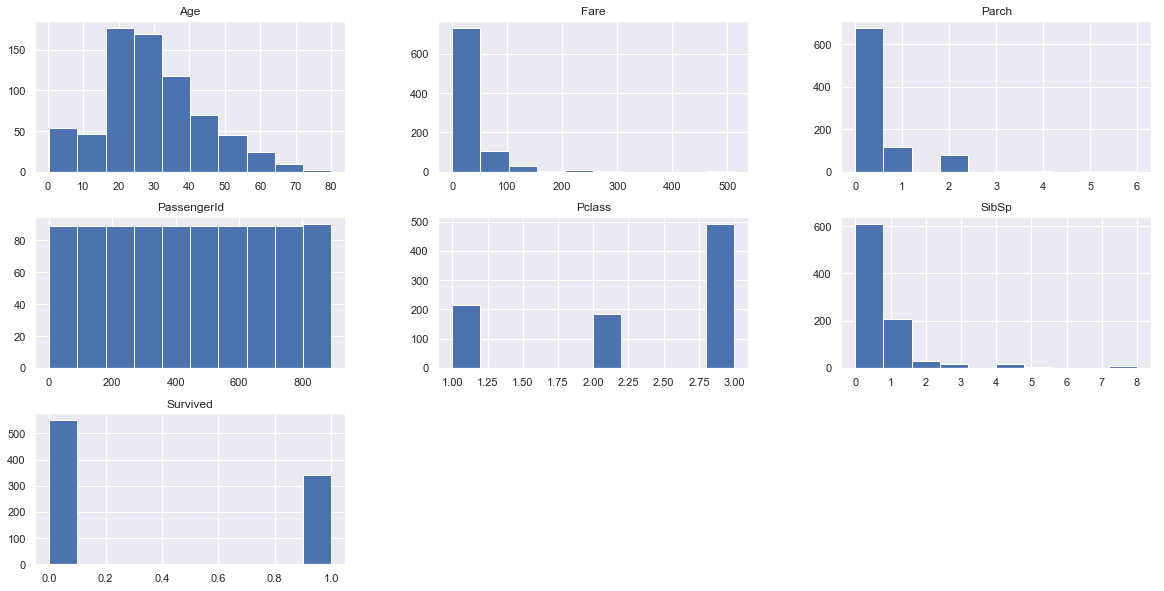

<Figure size 432x288 with 0 Axes>

In [15]:
train_df.hist(figsize = (20, 10))
plt.figure()

In [45]:
train_df['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
#Plt.title('Survived')
#sns.countplot('Survived', data = train_df, ax = ax[1])
#ax[1].set_title('Survived')
plt.show()

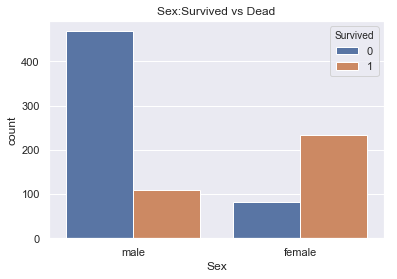

In [50]:
sns.countplot('Sex', hue = 'Survived', data = train_df)
plt.title('Sex:Survived vs Dead')
plt.show()

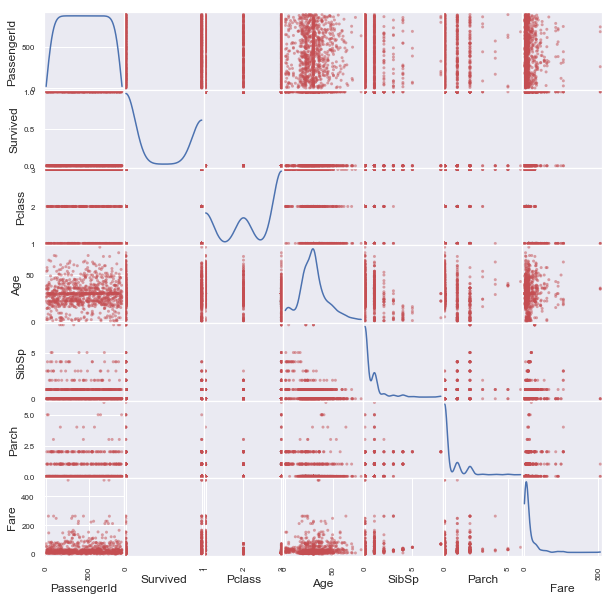

In [52]:
pd.plotting.scatter_matrix(train_df, figsize = (10, 10), color = 'R', diagonal = 'kde')
plt.show()

C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Roshan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Roshan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Roshan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Roshan\Anaconda3\l

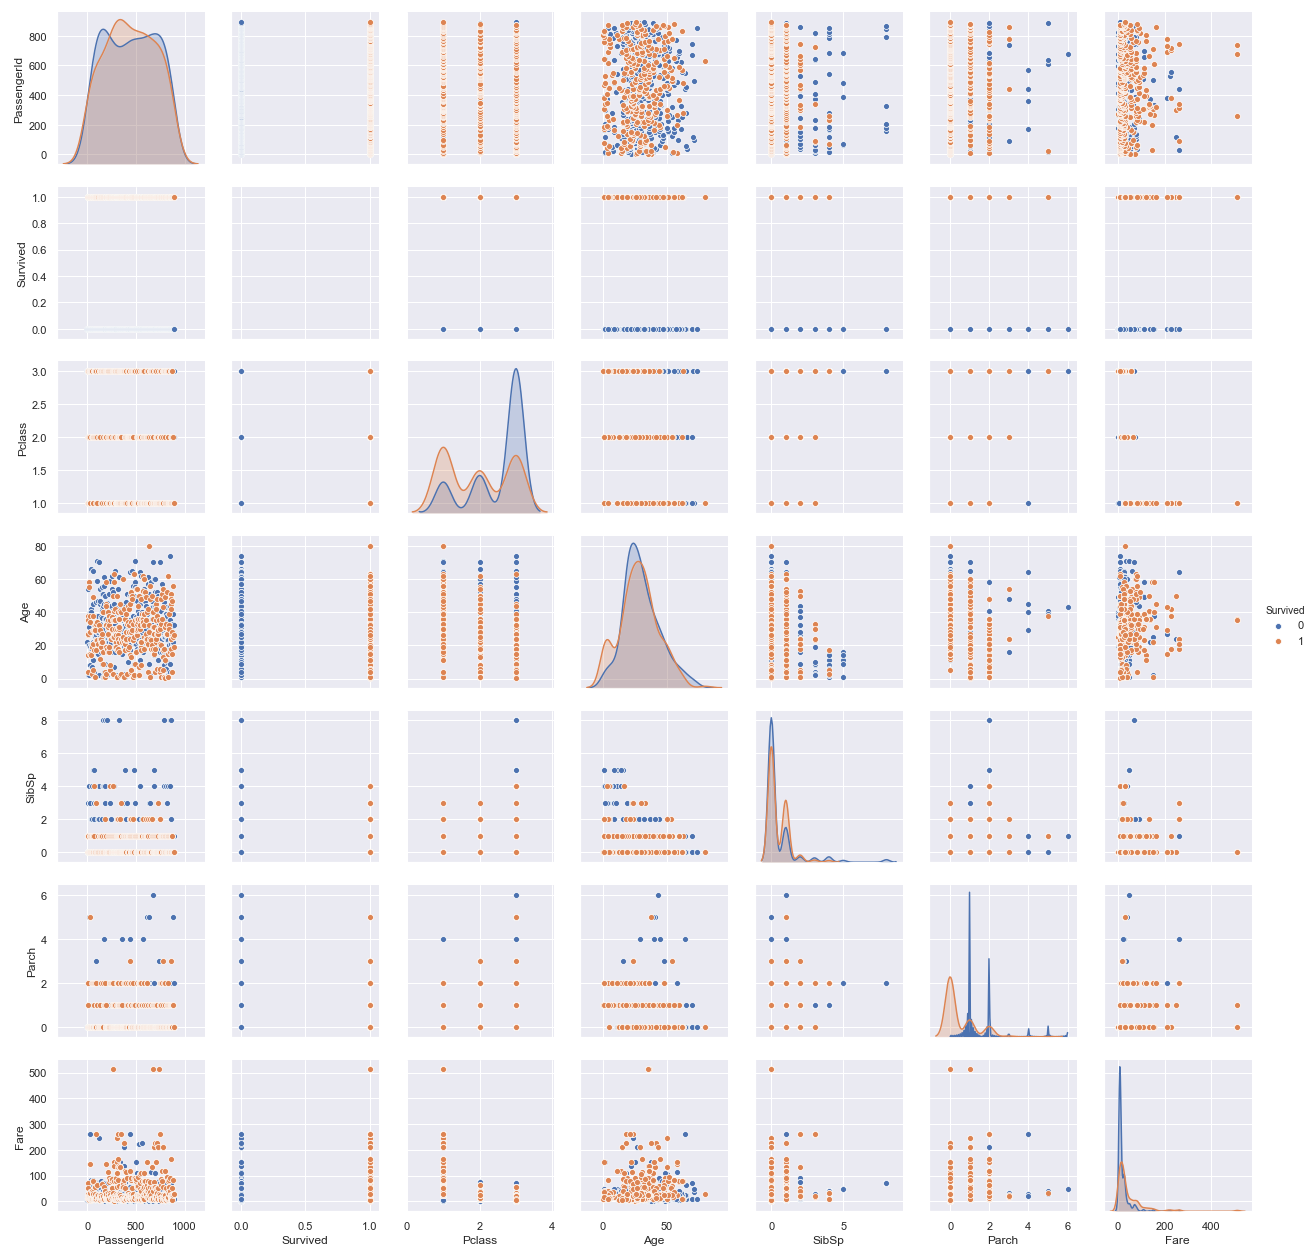

In [56]:
sns.pairplot(train_df, hue = 'Survived')

C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


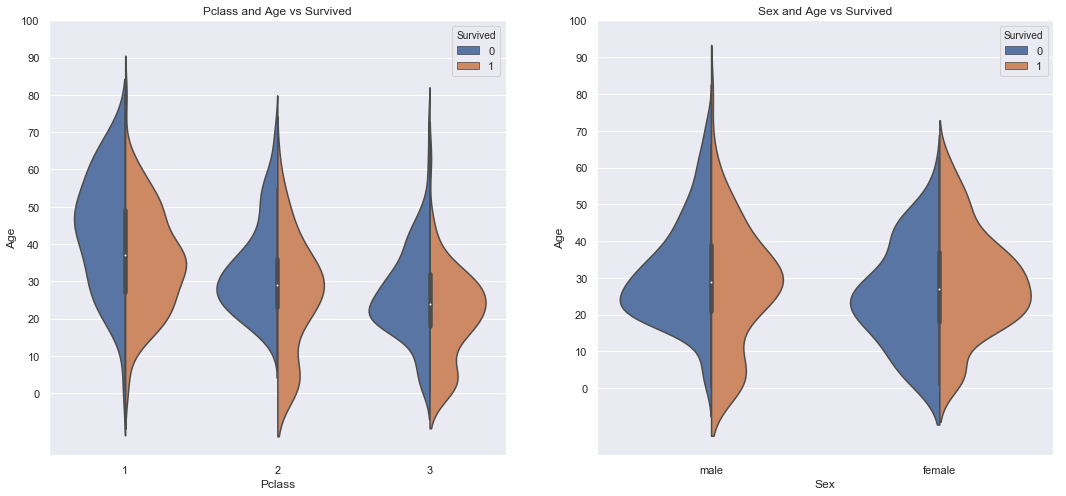

In [58]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot("Pclass", "Age", hue = "Survived", data = train_df, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue = "Survived", data = train_df, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

C:\Users\Roshan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


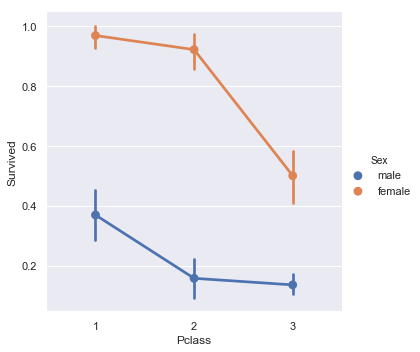

In [59]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train_df)
plt.show()

C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


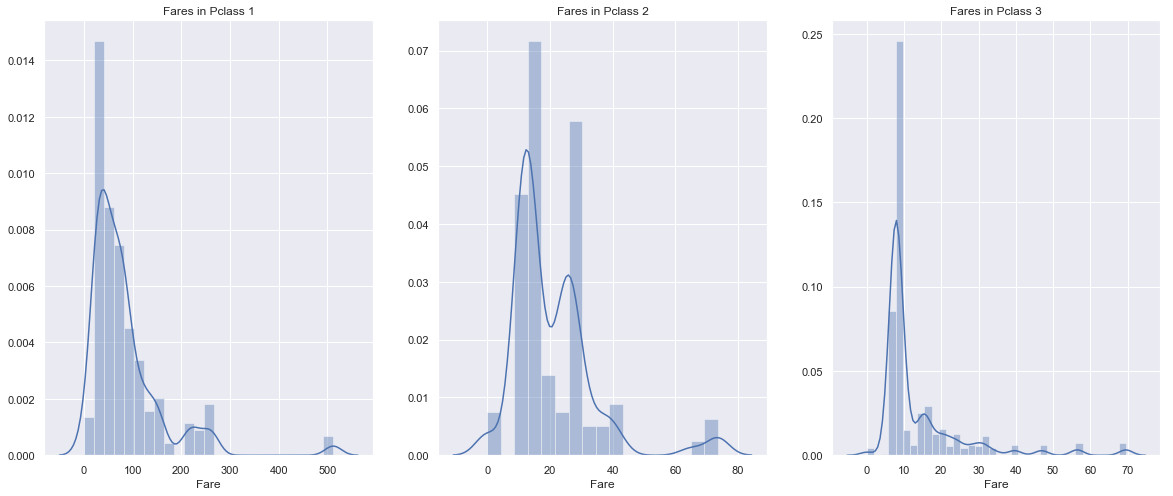

In [63]:
f,ax = plt.subplots(1, 3, figsize = (20, 8))

sns.distplot(train_df[train_df['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(train_df[train_df['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(train_df[train_df['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


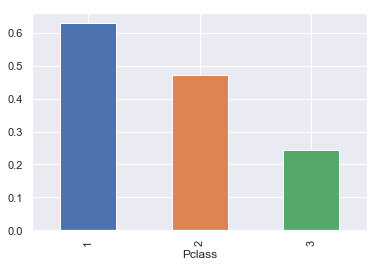

In [52]:
by_pclass = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean();
print(by_pclass)

by_pclass.plot.bar(x = 'Pclass', y = 'Survived', legend = False)
plt.show()

      Sex  Survived
0  female  0.742038
1    male  0.188908


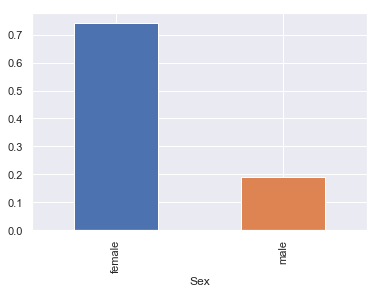

In [51]:
by_sex = train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean();
print(by_sex)

by_sex.plot.bar(x = 'Sex', y = 'Survived', legend = False)
plt.show()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


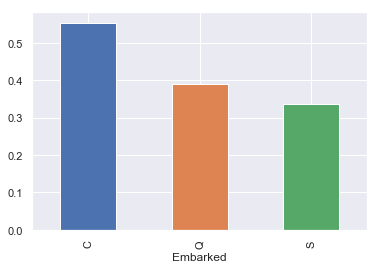

In [63]:
by_embarked = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()
print(by_embarked)

by_embarked.plot.bar(x = 'Embarked', y = 'Survived', legend = False)
plt.show()

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


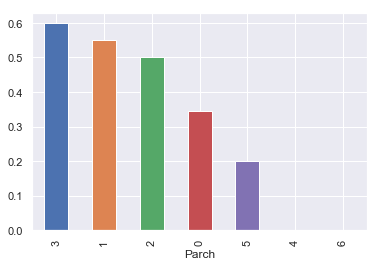

In [73]:
by_parch = train_df[['Parch', 'Survived']].groupby(
    ['Parch'], as_index = False).mean().sort_values(
    by = 'Survived', ascending = False)
print(by_parch)

by_parch.plot.bar(x = 'Parch', y = 'Survived', legend = False)
plt.show()

In [54]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


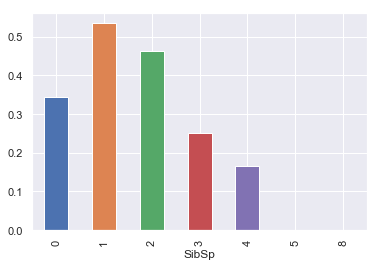

In [82]:
by_sibling = train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()
print(by_sibling)

by_sibling.plot.bar(x = 'SibSp', y = 'Survived', legend = False)
plt.show()

C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Median age survivors: 28.0, Median age non-survivers: 28.0


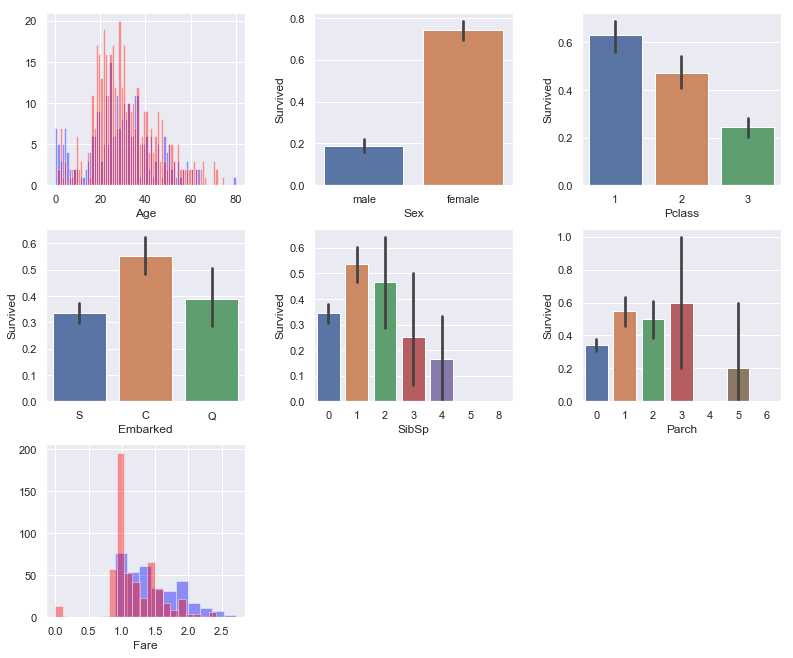

In [29]:
surv = train_df[train_df['Survived'] == 1]
nosurv = train_df[train_df['Survived'] == 0]
surv_col = "blue"
nosurv_col = "red"

#warnings.filterwarnings(action="ignore")

plt.figure(figsize = [12, 10])

plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins = range(0, 81, 1), kde = False, color = surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins = range(0, 81, 1), kde = False, color = nosurv_col, axlabel = 'Age')

plt.subplot(332)
sns.barplot('Sex', 'Survived', data = train_df)

plt.subplot(333)
sns.barplot('Pclass', 'Survived', data = train_df)

plt.subplot(334)
sns.barplot('Embarked', 'Survived', data = train_df)

plt.subplot(335)
sns.barplot('SibSp', 'Survived', data = train_df)

plt.subplot(336)
sns.barplot('Parch', 'Survived', data = train_df)

plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values + 1), kde = False, color = surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values + 1), kde = False, color = nosurv_col, axlabel = 'Fare')
plt.subplots_adjust(top = 0.92, bottom = 0.08, left = 0.10, right = 0.95, hspace = 0.25, wspace = 0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))

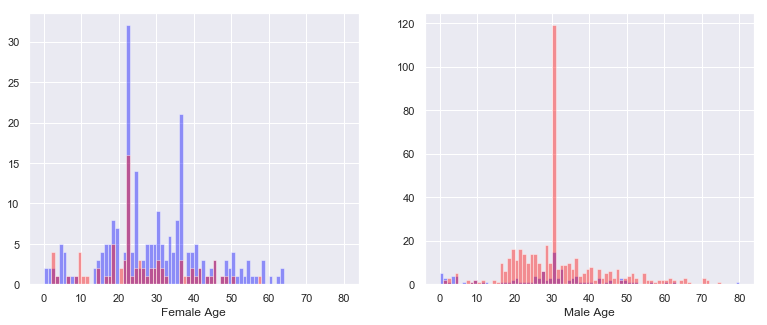

In [35]:
msurv = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')]
fsurv = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')]
mnosurv = train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'male')]
fnosurv = train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female')]

plt.figure(figsize = [13, 5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins = range(0, 81, 1), kde = False, color = 'Blue')
sns.distplot(fnosurv['Age'].dropna().values, bins = range(0, 81, 1), kde = False, axlabel = 'Female Age', color = 'Red')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins = range(0, 81, 1), kde = False, color = 'Blue')
sns.distplot(mnosurv['Age'].dropna().values, bins = range(0, 81, 1), kde = False, axlabel = 'Male Age', color = 'Red')
plt.show()

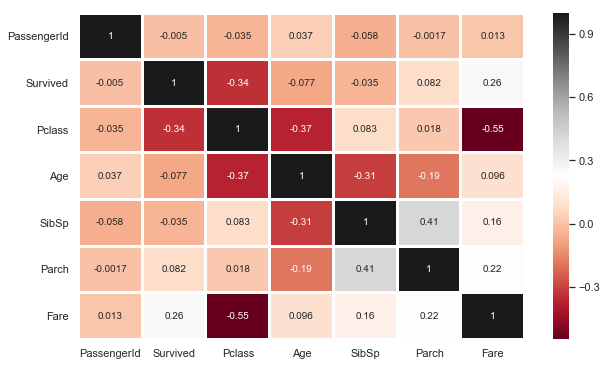

In [24]:
plt.subplots(figsize = (10, 6))
sns.heatmap(train_df.corr(), annot = True, linewidths = 2, cmap = 'RdGy')
plt.show()

C:\Users\Roshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Roshan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Roshan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Roshan\Ana

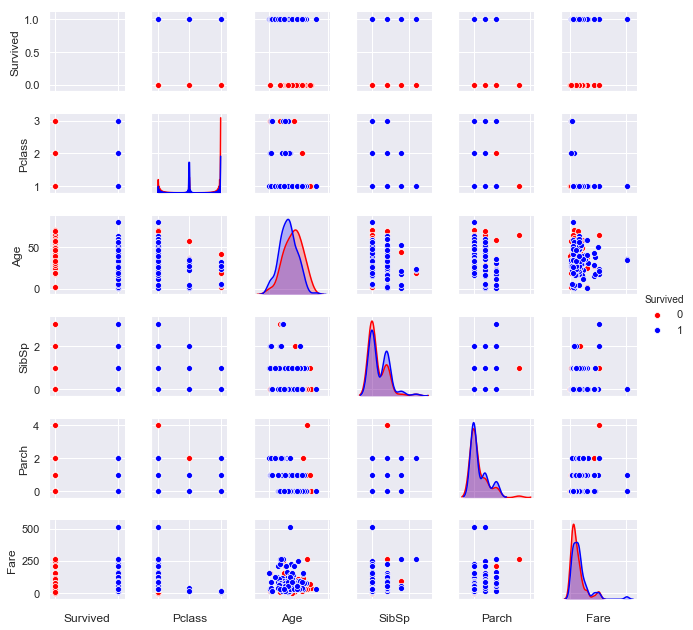

In [30]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
g = sns.pairplot(data = train_df.dropna(), vars = cols, size = 1.5, hue = 'Survived', palette = [nosurv_col, surv_col])
g.set(xticklabels = [])

C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


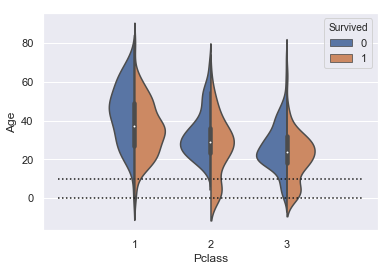

In [33]:
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train_df, split = True)
plt.hlines([0, 10], xmin = - 1, xmax = 3, linestyles = 'dotted')

C:\Users\Roshan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Roshan\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


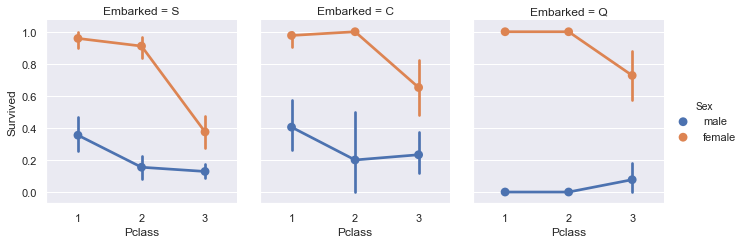

In [37]:
g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked',
                   data = train_df, aspect = 0.9, size = 3.5, ci = 95.0)

Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


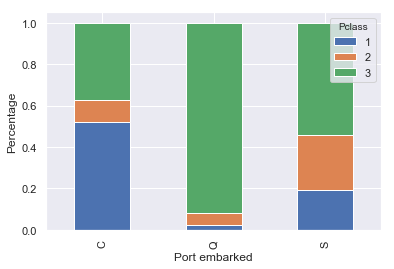

In [39]:
tab = pd.crosstab(df['Embarked'], df['Pclass'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

C:\Users\Roshan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


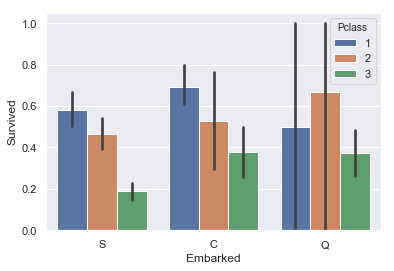

In [40]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Pclass', data = train_df)

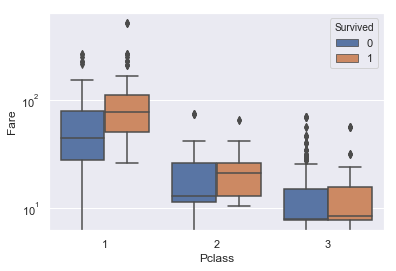

In [41]:
ax = sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_df);
ax.set_yscale('log')

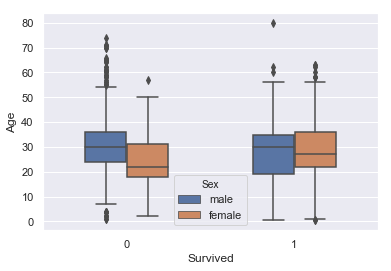

In [47]:
plt.plot(figsize = (20, 300))
sns.boxplot(x = 'Survived', y = 'Age', hue = 'Sex',  width = 0.5, data = train_df)
plt.show()

# Feature engineering 


In [26]:
len_train = len(train_df)


## Family size 

In [21]:
df['Family_Size'] = df['Parch'] + df['SibSp']

train_df['Family_Size'] = df['Family_Size'][ : len_train]
test_df['Family_Size'] = df['Family_Size'][ len_train : ]

## Age 

Many ages are missing from the dataset. We can fill those ages in many ways. Filling by overall median of the dataset is an option. But the hint about the age of the pasenger can come from the title they hold. We can guess that the title with Mrs can have higher average age than the title with Miss. 

In [20]:
df['Title'] = df['Name']
# Cleaning name and extracting Title
for name_string in df['Name']:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand = True)

In [23]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [24]:
# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace = True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']

In [27]:
for title in titles:
    age_to_impute = df.groupby('Title')['Age'].median()[titles.index(title)]
    df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Age'] = df['Age'][ : len_train]
test_df['Age'] = df['Age'][ len_train :]

# Dropping Title feature
df.drop('Title', axis = 1, inplace = True)

## Family survival 

In [31]:
df['Last_Name'] = df['Name'].apply(lambda x: str.split(x, ",")[0])
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:",  df.loc[df['Family_Survival'] != 0.5].shape[0])

for _, grp_df in df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " + str(df[df['Family_Survival'] != 0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train_df['Family_Survival'] = df['Family_Survival'][ : len_train]
test_df['Family_Survival'] = df['Family_Survival'][ len_train :]

Number of passengers with family survival information: 420
Number of passenger with family/group survival information: 546


## Fare bins

In [33]:
from sklearn.preprocessing import LabelEncoder

df['Fare'].fillna(df['Fare'].median(), inplace = True)

# Making Bins
df['FareBin'] = pd.qcut(df['Fare'], 5)

label = LabelEncoder()
df['FareBin_Code'] = label.fit_transform(df['FareBin'])

train_df['FareBin_Code'] = df['FareBin_Code'][ : len_train]
test_df['FareBin_Code'] = df['FareBin_Code'][ len_train : ]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

## Age bins 

In [35]:
df['AgeBin'] = pd.qcut(df['Age'], 4)

label = LabelEncoder()
df['AgeBin_Code'] = label.fit_transform(df['AgeBin'])

train_df['AgeBin_Code'] = df['AgeBin_Code'][: len_train]
test_df['AgeBin_Code'] = df['AgeBin_Code'][len_train :]

train_df.drop(['Age'], 1, inplace = True)
test_df.drop(['Age'], 1, inplace = True)

## Mapping SEX 

In [36]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

## Dropping unnecessary 

In [37]:
train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)


In [40]:
train_df.head()

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,1,0.5,0,0
1,1,1,1,1,0.5,4,3
2,1,3,1,0,0.5,1,1
3,1,1,1,1,0.0,4,2
4,0,3,0,0,0.5,1,2


In [41]:
test_df.head()

,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,3,0,0,0.5,0,2
1,3,1,1,0.5,0,3
2,2,0,0,0.5,1,3
3,3,0,0,0.5,1,1
4,3,1,2,1.0,2,0


In [22]:
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked', u'FamilySize', u'Title']], 
                 hue = 'Survived', palette = 'seismic', size = 1.2, diag_kind = 'kde',
                 diag_kws = dict(shade = True), plot_kws = dict(s = 10))
g.set(xticklabels = [])

KeyError: "['FamilySize' 'Title'] not in index"

In [ ]:
tab = pd.crosstab(train['Large_Family'], train['Survived'])
print(tab)
sns.barplot('Large_Family', 'Survived', data=train)

In [ ]:
tab = pd.crosstab(train['Shared_ticket'], train['Survived'])
print(tab)
sns.barplot('Shared_ticket', 'Survived', data=train)

In [ ]:
tab = pd.crosstab(train['Young'], train['Survived'])
print(tab)
sns.barplot('Young', 'Survived', data=train)

# Training the model 

## Input matrix 

In [42]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy()

## Feature scaling 

In [44]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 26, metric = 'minkowski', 
                           metric_params = None, n_jobs = 1, n_neighbors = 6, p = 2, 
                           weights = 'uniform')
knn.fit(X, y)
y_pred = knn.predict(X)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y, y_pred)

0.8608305274971941

# Add cross validation 

# Add leaning curve 

